In [5]:
from typing import Dict, Optional
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from xcube.core.store import new_data_store
from xcube.core.select import select_variables_subset

In [6]:
clip_repo_name = "clip_05_burning_lands"

In [7]:
from init_nb import ws_path, cliplib
clip_dir = ws_path / clip_repo_name
clip_data_dir = clip_dir / "data"
clip_cache_dir = clip_data_dir / "temp"
if not clip_cache_dir.exists():
    clip_cache_dir.mkdir()

Open CCI Open Data Portal store and list contents:

In [8]:
odp_store = new_data_store("cciodp")

In [9]:
# list(cz_store.get_data_ids())

Open LST dataset

In [10]:
odp_store.describe_data('esacci.FIRE.mon.L4.BA.multi-sensor.multi-platform.SYN.v1-0.grid')

/opt/conda/lib/python3.9/site-packages/xcube_cci/cciodp.py:1260: CciOdpWarning: Variable "vegetation_class_name" has no fill value, cannot set one. For parts where no data is available you will see random values. This is usually the case when data is missing for a time step.
  warnings.warn(f'Variable "{fixed_key}" has no fill value, '


In [11]:
odp_store.get_open_data_params_schema()

In [14]:
ba_dataset = odp_store.open_data('esacci.FIRE.mon.L4.BA.multi-sensor.multi-platform.SYN.v1-0.grid', variable_names=["burned_area"])
ba_dataset

<xarray.Dataset>
Dimensions:           (time: 12, lat: 720, lon: 1440, bounds: 2, bnds: 2,
                       vegetation_class: 18)
Coordinates:
  * lat               (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
    lat_bounds        (lat, bounds) float64 dask.array<chunksize=(720, 2), meta=np.ndarray>
  * lon               (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    lon_bounds        (lon, bounds) float64 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * time              (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-12-1...
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
  * vegetation_class  (vegetation_class) int32 10 20 30 40 ... 150 160 170 180
Dimensions without coordinates: bounds, bnds
Data variables:
    burned_area       (time, lat, lon) float32 dask.array<chunksize=(1, 360, 1440), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.FIRE.mon.L4.BA.multi-sensor.multi-platfor...
    date_created:            2023-01-19T16:47:00.186142
    processing_level:        L4
    time_coverage_start:     2019-01-01T00:00:00
    time_coverage_end:       2020-01-01T00:00:00
    time_coverage_duration:  P365DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

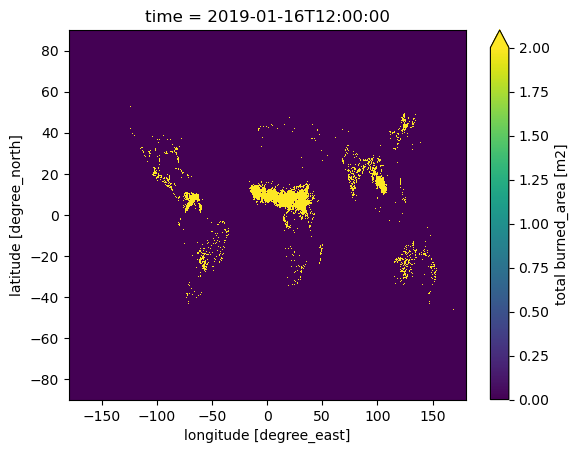

In [18]:
ba_dataset.burned_area.isel(time=0).plot.imshow(vmax=2)